In [24]:
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
import scipy.optimize
from scipy.optimize import minimize
#from scipy.ndimage import gaussian_filter1d
import sys

In [25]:
date = '20220328'
dataNo = 4
scanNo = 5

In [26]:
path = r"./"+date
path_img = path + r"/data" + str('%03d' % dataNo) + "/raw"
path_scan = path + r"/scandir/Scan" + str('%03d' % scanNo) + '.txt'
path_param = path + r"/scandir/Parameters" + str('%03d' % scanNo) + '.txt'
scan_data = pd.read_csv(path_scan, delimiter='\t')

In [27]:
param_name = 'T0046: TOF in the vertical lattice (usec.)'
scan_param =scan_data[param_name]
unique_param = scan_param.unique()
sample1 = unique_param[1]
sample2 = unique_param[10]
sample3 = unique_param[19]
unit = '[us]'

In [28]:
share = Path(path_img)
if share.exists():
    trans_files = list(Path(path_img).glob('seq*_trans001.tiff'))
    flat_files = list(Path(path_img).glob('seq*_flat001.tiff'))
    update_files = list(Path(path_img).glob('seq*_update001.tiff'))
else:
    print(No)

img_flat_ave =[]
img_trans_ave = []
img_trans_list = []
for N in range(len(trans_files)):
    img_flat_ave += [np.array(Image.open(flat_files[N]))]
    img_trans_ave += [np.array(Image.open(trans_files[N]))]
img_flat_ave = np.average(img_flat_ave,axis=0)
img_trans_ave =np.average(img_trans_ave,axis=0) -img_flat_ave
for N in range(len(trans_files)):
    img_trans_list += [np.array(Image.open(trans_files[N])) - img_flat_ave]

img_trans_sample1 = []
img_trans_sample2 = []
img_trans_sample3 = []
for N in range(len(trans_files)):
    if scan_param[N] == sample1:
        img_trans_sample1 += [np.array(Image.open(trans_files[N]))]
    elif scan_param[N] == sample2:
        img_trans_sample2 += [np.array(Image.open(trans_files[N]))]
    elif scan_param[N] == sample3:
        img_trans_sample3 += [np.array(Image.open(trans_files[N]))]
img_trans_sample1 = np.average(img_trans_sample1,axis=0) -img_flat_ave
img_trans_sample2 = np.average(img_trans_sample2,axis=0) -img_flat_ave
img_trans_sample3 = np.average(img_trans_sample3,axis=0) -img_flat_ave

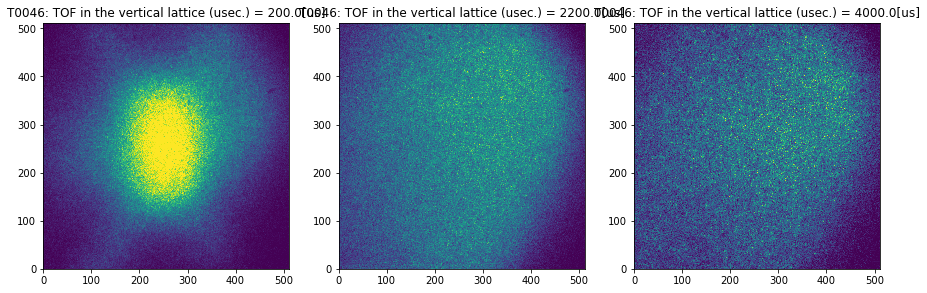

In [29]:
vmin = 0
vmax = 5000
xlim_1 = 120
xlim_2 = 320
ylim_1 = 140
ylim_2 = 340

fig =plt.figure(figsize=[15,10])
ax1 = fig.add_subplot(2,3,1)
mappable =ax1.pcolormesh(img_trans_sample1, vmin=vmin, vmax=vmax, shading='auto')
ax1.set_aspect('equal')
# ax1.set_xlim(120,320)
# ax1.set_ylim(140,340)
ax1.set_title(param_name+ " = %.01f"%(sample1)+unit)

ax2 = fig.add_subplot(2,3,2)
mappable =ax2.pcolormesh(img_trans_sample2, vmin=vmin, vmax=vmax, shading='auto')
ax2.set_aspect('equal')
# ax2.set_xlim(120,320)
# ax2.set_ylim(140,340)
ax2.set_title(param_name+" = %.01f"%(sample2)+unit)

ax3 = fig.add_subplot(2,3,3)
mappable =ax3.pcolormesh(img_trans_sample3, vmin=vmin, vmax=vmax, shading='auto')
ax3.set_aspect('equal')
# ax3.set_xlim(120,320)
# ax3.set_ylim(140,340)
ax3.set_title(param_name+ " = %.01f"%(sample3)+unit)


plt.show()

a1= 0.00391308745622651
b1= 261.1589407908927
c1= 324.13558932083987
d= -0.0007964347476781859
$\delta$c1= 5.54885504941402


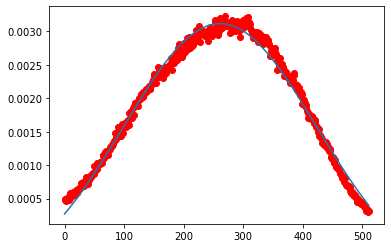

In [47]:
N=10
x_list =np.arange(np.shape(img_trans_list[0])[0])
nx=np.sum(img_trans_list[N], axis=0)/np.sum(img_trans_list[N])
ny=np.sum(img_trans_list[N], axis=1)/np.sum(img_trans_list[N])
CoMy = []
CoMx = []

for i in range(len(nx)):
    CoMx += [i*nx[i]]
for i in range(len(ny)):
    CoMy += [i*ny[i]]
CoMx = np.sum(CoMx)
CoMy = np.sum(CoMy)
para_ini=[np.max(nx), CoMx,100, np.mean(nx[0:5])]
def nonlinear_fit(x,a1,b1,c1,d):
    return a1*np.exp(-2*(x-b1)**2/c1**2)+d
param, cov=scipy.optimize.curve_fit(nonlinear_fit,x_list,nx,para_ini)
list_x1=x_list
list_y1=[]
for num in list_x1:
    list_y1.append(param[0]*np.exp(-2*(num-param[1])**2/param[2]**2)+param[3])

perr=np.sqrt(np.diag(cov))
print("a1=",str(param[0]))
print("b1=",str(param[1]))
print("c1=",str(param[2]))
print("d=",str(param[3]))
print(r"$\delta$c1=",str(perr[2]))
plt.scatter(x_list,nx, label='Data',c="r")
plt.plot(x_list,list_y1)

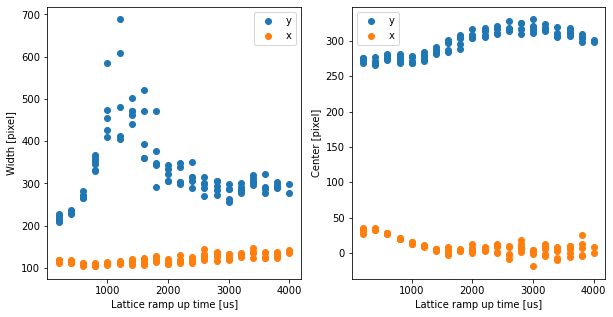

In [51]:
wx_list =[]
wy_list =[]
cx_list =[]
cy_list =[]
x_list =np.arange(np.shape(img_trans_list[0])[0])
y_list =np.arange(np.shape(img_trans_list[0])[1])
for N in range(len(trans_files)):
    nx=np.sum(img_trans_list[N], axis=0)/np.sum(img_trans_list[N])
    ny=np.sum(img_trans_list[N], axis=1)/np.sum(img_trans_list[N])
    CoMy = []
    CoMx = []
    for i in range(len(nx)):
        CoMx += [i*nx[i]]
    for i in range(len(ny)):
        CoMy += [i*ny[i]]
    CoMx = np.sum(CoMx)
    CoMy = np.sum(CoMy)
    if N == 0:
        para_x_ini = [np.max(nx), CoMx, 300, np.mean(nx[0:5])]
    else:
        para_x_ini = param_x[0:5]
    def nonlinear_fit(x,a1,b1,c1,d):
        return a1/c1*np.exp(-2*(x-b1)**2/c1**2)+d
    param_x, cov = scipy.optimize.curve_fit(nonlinear_fit,x_list,nx,para_x_ini)
    wx_list.append(abs(param_x[2]))
    cx_list.append(param_x[1])
    para_y_ini = [np.max(ny), CoMy,20, np.mean(ny[0:5])]
    if N == 0:
        para_y_ini = [np.max(ny), CoMy,20, np.mean(ny[0:5])]
    else:
        para_y_ini = param_y[0:5]
    param_y, cov = scipy.optimize.curve_fit(nonlinear_fit,y_list,ny,para_y_ini)
    wy_list.append(abs(param_y[2]))
    cy_list.append(param_y[1])

xlabel = 'Lattice ramp up time [us]'

fig =plt.figure(figsize=[10,5])
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(scan_param,wy_list, label ='y')
ax1.scatter(scan_param,wx_list, label='x')
ax1.set_xlabel(xlabel)
ax1.set_ylabel('Width [pixel]')
ax1.legend()

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(scan_param,cy_list, label ='y')
ax2.scatter(scan_param,cx_list, label='x')
ax2.set_xlabel(xlabel)
ax2.set_ylabel('Center [pixel]')
ax2.legend()

In [38]:
param_x[0:6]

array([ 9.89663208e-02, -3.34754053e+00, -1.37033659e+02,  2.07023797e-03])

In [33]:
np.shape(scan_param)
np.shape(wy_list)

(101,)

In [34]:
np.shape(wy_list)

(101,)

In [40]:
np.sum(CoMx)


253.9867047261156

In [49]:
cx_list

[21.826367225863994,
 31.668349685671146,
 30.494227936728336,
 33.37701002972919,
 34.137941174142924,
 33.36418319772573,
 35.60163366149678,
 34.75795256770347,
 27.19728286628489,
 19.733035822125203,
 16.08097639807648,
 9.697823936497322,
 6.124274718766534,
 1.8139571622805903,
 5.736650082453672,
 4.767140192429637,
 5.37942096521006,
 12.130469788716484,
 -0.7865838143973465,
 8.45479706367841,
 4.552691863306705,
 10.083056094227443,
 2.937735052762288,
 9.87272233064764,
 24.79575094379283,
 8.302647311652622,
 12.787635189648656,
 9.79495582171282,
 -6.898006924013471,
 5.119202363964553,
 -0.9676775791679476,
 12.924225959380015,
 9.06886580323626,
 -0.2058136254922493,
 3.636363062579037,
 13.338467052480006,
 3.7367215787599655,
 7.944091879399866,
 4.175128400328992,
 9.699532027300467,
 14.612899105330897,
 19.58274123046598,
 27.77429002339971,
 33.86765616608222,
 26.70156645217621,
 34.29429700735988,
 28.478939427518753,
 20.042833531176765,
 12.989191617440095,
 8